# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile
import os 
from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
pages_list_d = {}
contact_sheet_list_d = {}
page_text_list_d = {} 

# the rest is up to you!

In [2]:
def zip_extract(source_dir):
    if not os.path.isdir(source_dir):
        os.mkdir(source_dir)
        local_zip = 'readonly/{}.zip'.format(source_dir)
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall(source_dir)
        zip_ref.close()
    pages_list = os.listdir(source_dir)
    for i in range(len(pages_list)):
        if source_dir == 'images':
            pages_list[i] = 'images/'+str(pages_list[i])
        elif source_dir == 'small_img':
            pages_list[i] = 'small_img/'+str(pages_list[i])
    pages_list = sorted(pages_list,key=lambda x:int(x.split('.')[0].split('-')[1]))
    return pages_list

In [3]:
def initialize():
    print('data initialisation started')
    i=0
    for each_page in pages_list:
        img.append(Image.open(each_page))
        face_dictionary['page{}'.format(i)] = []
        i+=1

In [4]:
def contact_sheet_gen(fd):
        print('contact sheet being prepared')
        import PIL
        from PIL import Image
        first_image = fd[0]
        width = first_image.width*5
        if len(fd)%5 == 0:
            height = first_image.height*int(len(fd)/5)
        elif len(fd)%5 > 0:
            height = first_image.height*int((len(fd)/5 + 1))
        contact_sheet=PIL.Image.new(first_image.mode, (width,height))
        x=0
        y=0
        for img in fd:

            contact_sheet.paste(img, (x, y) )

            if x+first_image.width == contact_sheet.width:
                x=0
                y=y+first_image.height
            else:
                x=x+first_image.width

        contact_sheet = contact_sheet.resize((int(contact_sheet.width),int(contact_sheet.height) ))
        return contact_sheet

In [5]:
def face_extraction(pages_list,img):
    
    contact_sheet_list = []
    
    for i in range(len(pages_list)):
        fd = []
        page = pages_list[i]
        sheet = 'sheet{}'.format(i)
        print('Face data of {} being collected'.format(pages_list[i]))
        cv_img = cv.imread(page)
        #gray = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
        #th, im_th_tz = cv.threshold(gray, 128, 255, cv.THRESH_TOZERO)
        faces = face_cascade.detectMultiScale(cv_img,1.35,4)
        pil_img=img[i].convert("RGB")
            # Set our drawing context
        drawing=ImageDraw.Draw(pil_img)
            # And plot all of the rectangles in faces
        #for x,y,w,h in faces:
            #drawing.rectangle((x,y,x+w,y+h), outline="red")
            #Finally lets display this
        #display(pil_img)
        #print(faces)
        if faces == ():
            contact_sheet_list.append('noface')
        else:
            for x,y,w,h in faces:
                print('faces are being collected')
                temp_img = img[i].crop((x,y,x+w,y+h))
                temp_res_img = temp_img.resize((100,100))
                fd.append(temp_res_img)
            contact_sheet_list.append(contact_sheet_gen(fd))
    return contact_sheet_list

In [6]:
def binarize(image_to_transform, threshold):
    output_image=image_to_transform.convert("L")
    for x in range(output_image.width):
        for y in range(output_image.height):
            if output_image.getpixel((x,y))< threshold:
                output_image.putpixel( (x,y), 0 )
            else:
                output_image.putpixel( (x,y), 255 )
    return output_image

In [7]:
def page_text_extract(pages_list,img):
    print('Text extraction process initialised')
    page_text_list = []
    for i in range(len(pages_list)):
        print('page{} data extracted'.format(i))
        strng=pytesseract.image_to_string(binarize(img[i],150))
        strng=strng.lower()
        import string
        comparison=''
        for character in strng:
            if character in string.ascii_lowercase:
                comparison = comparison + character
        page_text_list.append(comparison)
    return page_text_list



In [8]:
def search():
    key_word = ''
    source_dir = ''
    img = []
    pages_list = []
    contact_sheet_list = []
    page_text_list = []
    while(True):
        if key_word.strip() != '':
            break
        else:
            key_word = input("Enter the word to be searched: ")
    while(True):
        if (source_dir == 'small_img' or source_dir == 'images'):
            break
        else:
            source_dir = input("Enter the directory you want to search in, small_img or images? : ")
    if source_dir not in page_text_list_d:
        print('This is going to take a while. Please wait till the data setup is done')
        pages_list = zip_extract(source_dir) 
        
        for each_page in pages_list:
            img.append(Image.open(each_page))
            
        contact_sheet_list = face_extraction(pages_list,img)
        page_text_list = page_text_extract(pages_list,img)
        page_text_list_d[source_dir] = page_text_list
        contact_sheet_list_d[source_dir] = contact_sheet_list
        pages_list_d[source_dir] = pages_list
    for i in range(len(pages_list_d[source_dir])):
        if key_word in page_text_list_d[source_dir][i]:
            print('Results found in file a-{}.png'.format(i))
            if contact_sheet_list_d[source_dir][i] == 'noface':
                print('But there were no faces in that file!')
            else:
                display(contact_sheet_list_d[source_dir][i])


Enter the word to be searched: christopher
Enter the directory you want to search in, small_img or images? : small_img
This is going to take a while. Please wait till the data setup is done
Text extraction process initialised
page0 data extracted
page1 data extracted
page2 data extracted
page3 data extracted
Face data of small_img/a-0.png being collected
faces are being collected
faces are being collected
faces are being collected
faces are being collected
faces are being collected
faces are being collected
contact sheet being prepared
Face data of small_img/a-1.png being collected
faces are being collected
faces are being collected
faces are being collected
faces are being collected
contact sheet being prepared
Face data of small_img/a-2.png being collected
faces are being collected
faces are being collected
faces are being collected
contact sheet being prepared
Face data of small_img/a-3.png being collected
faces are being collected
faces are being collected
contact sheet being prepa

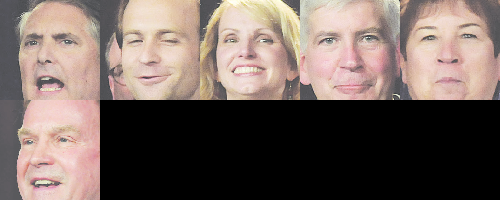

Results found in file a-3.png


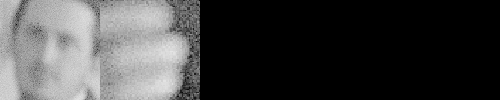

In [21]:
#SEARCH WITH CHRISTOPHER IN SMALL_IMG - TEST NO 1 
search()

Enter the word to be searched: mark
Enter the directory you want to search in, small_img or images? : images
This is going to take a while. Please wait till the data setup is done
Face data of images/a-0.png being collected
faces are being collected
faces are being collected
faces are being collected
faces are being collected
faces are being collected
faces are being collected
contact sheet being prepared
Face data of images/a-1.png being collected
faces are being collected
faces are being collected
faces are being collected
faces are being collected
contact sheet being prepared
Face data of images/a-2.png being collected
faces are being collected
faces are being collected
faces are being collected
contact sheet being prepared
Face data of images/a-3.png being collected
faces are being collected
faces are being collected
contact sheet being prepared
Face data of images/a-4.png being collected
Face data of images/a-5.png being collected
faces are being collected
faces are being collecte

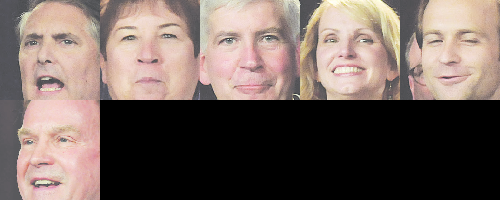

Results found in file a-1.png


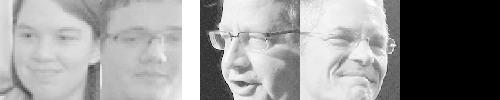

Results found in file a-2.png


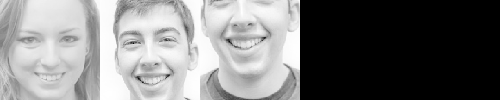

Results found in file a-3.png


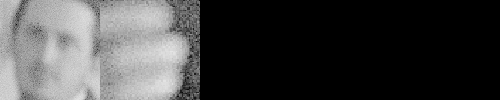

Results found in file a-5.png


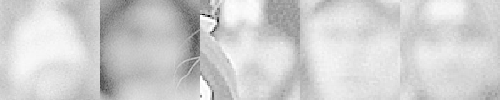

Results found in file a-8.png
But there were no faces in that file!
Results found in file a-9.png


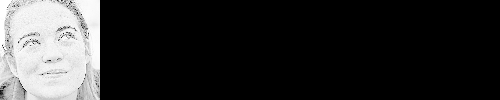

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png


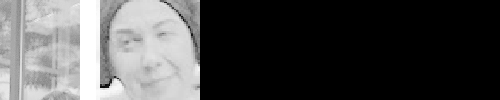

In [9]:
#SEARCH WITH MARK IN IMAGES - TEST NO 2 
search()